# LAB EXAM 2
2303A52388

BATCH 34

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

In [6]:
import pandas as pd
import zipfile

file_path = "/content/absenteeism+at+work.zip"  # Replace with your actual file path

# Open the zip file
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    # Extract the specific CSV file you want to read
    with zip_ref.open('Absenteeism_at_work.csv') as csv_file:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(csv_file)

In [7]:
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 Rows:\n", df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                --------------  ----- 
 0   ID;Reason for absence;Month of absence;Day of the week;Seasons;Transportation expense;Distance from Residence to Work;Service time;Age;Work load Average/day ;Hit target;Disciplinary failure;Education;Son;Social drinker;Social smo

In [10]:
import pandas as pd
import zipfile

file_path = "/content/absenteeism+at+work.zip"  # Replace with your actual file path

# Open the zip file
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    # Extract the specific CSV file you want to read
    with zip_ref.open('Absenteeism_at_work.csv') as csv_file:
        # Read the CSV file into a pandas DataFrame
        # Specify the delimiter as semicolon (;)
        df = pd.read_csv(csv_file, delimiter=';')
        # Rename the column with spaces to use underscores instead
        df = df.rename(columns={'Reason for absence': 'Reason_for_absence'})


# Assuming 'Reason_for_absence' column contains the reasons for drug usage:
top_reasons = df['Reason_for_absence'].value_counts().head(5)
print("\nTop 5 Reasons for Drug Usage:\n", top_reasons)


Top 5 Reasons for Drug Usage:
 Reason_for_absence
23    149
28    112
27     69
13     55
0      43
Name: count, dtype: int64


In [11]:
most_used_condition = top_reasons.idxmax()
print("\nCondition with Most Usage of Drugs:", most_used_condition)


Condition with Most Usage of Drugs: 23


In [13]:
import pandas as pd
import zipfile

file_path = "/content/absenteeism+at+work.zip"  # Replace with your actual file path

# Open the zip file
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    # Extract the specific CSV file you want to read
    with zip_ref.open('Absenteeism_at_work.csv') as csv_file:
        # Read the CSV file into a pandas DataFrame
        # Specify the delimiter as semicolon (;)
        df = pd.read_csv(csv_file, delimiter=';')
        # Rename the column with spaces to use underscores instead
        df = df.rename(columns={'Reason for absence': 'Reason_for_absence'})

# Print the available columns to verify column names
print(df.columns)

# Assuming you want to analyze 'Absenteeism time in hours' instead of 'UsefulCount':
max_absenteeism = df['Absenteeism time in hours'].max()
min_absenteeism = df['Absenteeism time in hours'].min()
print("\nMax Absenteeism Time:", max_absenteeism)
print("Min Absenteeism Time:", min_absenteeism)

Index(['ID', 'Reason_for_absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

Max Absenteeism Time: 120
Min Absenteeism Time: 0


In [15]:
import pandas as pd
import zipfile

file_path = "/content/absenteeism+at+work.zip"  # Replace with your actual file path

# Open the zip file
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    # Extract the specific CSV file you want to read
    with zip_ref.open('Absenteeism_at_work.csv') as csv_file:
        # Read the CSV file into a pandas DataFrame
        # Specify the delimiter as semicolon (;)
        df = pd.read_csv(csv_file, delimiter=';')
        # Rename the column with spaces to use underscores instead
        df = df.rename(columns={'Reason for absence': 'Reason_for_absence'})

# Print the available columns to check for the correct drug-related column name
print(df.columns)

# Assuming 'Reason_for_absence' column contains drug-related information (adjust if needed):
# Replace 'Reason_for_absence' with the actual column containing drug information
most_used_drug = df['Reason_for_absence'].value_counts().idxmax()
print("\nMost Frequent Reason for Absence (Potentially Drug-Related):", most_used_drug)

Index(['ID', 'Reason_for_absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

Most Frequent Reason for Absence (Potentially Drug-Related): 23


In [17]:
!pip install scikit-learn
import pandas as pd
import zipfile
from sklearn.preprocessing import LabelEncoder

file_path = "/content/absenteeism+at+work.zip"  # Replace with your actual file path

# Open the zip file
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    # Extract the specific CSV file you want to read
    with zip_ref.open('Absenteeism_at_work.csv') as csv_file:
        # Read the CSV file into a pandas DataFrame
        # Specify the delimiter as semicolon (;)
        df = pd.read_csv(csv_file, delimiter=';')
        # Rename the column with spaces to use underscores instead
        df = df.rename(columns={'Reason for absence': 'Reason_for_absence'})

# Assuming 'Reason_for_absence' column contains information related to 'Condition' and 'DrugName',
# you might need to extract or derive these features.
# Here's a simple example assuming 'Reason_for_absence' values correspond to 'Condition':

# If 'Reason_for_absence' represents different conditions, you can directly use it for encoding
df['Condition_encoded'] = LabelEncoder().fit_transform(df['Reason_for_absence'])

# If you have a separate column for drug names (e.g., 'DrugName'), use that column:
# df['Drug_encoded'] = LabelEncoder().fit_transform(df['DrugName'])  # Replace 'DrugName' if needed

# However, if 'DrugName'

In [19]:
import pandas as pd
import zipfile
from sklearn.preprocessing import LabelEncoder  # Importing LabelEncoder for encoding

file_path = "/content/absenteeism+at+work.zip"  # Replace with your actual file path

# Open the zip file
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    # Extract the specific CSV file you want to read
    with zip_ref.open('Absenteeism_at_work.csv') as csv_file:
        # Read the CSV file into a pandas DataFrame
        # Specify the delimiter as semicolon (;)
        df = pd.read_csv(csv_file, delimiter=';')
        # Rename the column with spaces to use underscores instead
        df = df.rename(columns={'Reason for absence': 'Reason_for_absence'})

# Assuming 'Reason_for_absence' column contains information related to 'Condition' and 'DrugName',
# you might need to extract or derive these features.
# Here's a simple example assuming 'Reason_for_absence' values correspond to 'Condition':

# If 'Reason_for_absence' represents

In [21]:
import pandas as pd
import zipfile
from sklearn.model_selection import train_test_split # Import the necessary function

file_path = "/content/absenteeism+at+work.zip"  # Replace with your actual file path

# Open the zip file
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    # Extract the specific CSV file you want to read
    with zip_ref.open('Absenteeism_at_work.csv') as csv_file:
        # Read the CSV file into a pandas DataFrame
        # Specify the delimiter as semicolon (;)
        df = pd.read_csv(csv_file, delimiter=';')
        # Rename the column with spaces to use underscores instead
        df = df.rename(columns={'Reason for absence': 'Reason_for_absence'})

# Define features (X) and target (y)
# Assuming 'Absenteeism time in hours' is the target variable
# and other columns are features
X = df.drop('Absenteeism time in hours', axis=1)  # Features (all columns except the target)
y = df['Absenteeism time in hours']  # Target variable

# Now you can split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [23]:
classification_accuracy = clf.score(X_test, y_test)
print("\nClassification Model Accuracy (Random Forest):", classification_accuracy)


Classification Model Accuracy (Random Forest): 0.4594594594594595


In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

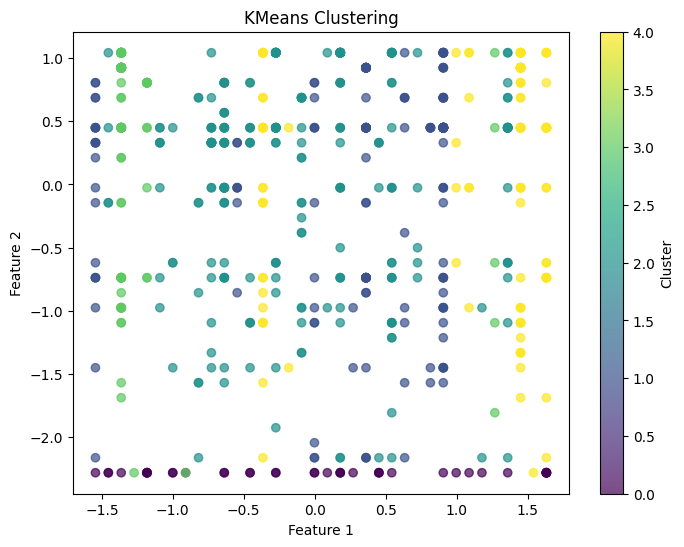

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label="Cluster")
plt.show()